In [57]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [58]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
with open('/content/drive/MyDrive/Colab Notebooks/Test/data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
x_pre_0 = x_train[0]
x_pre_1 = x_train[32]
x_pre_2 = x_train[40]
x_pre_3 = x_train[70]
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train, 10)
x_train, y_train = shuffle(x_train, y_train)

In [61]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 884ms/step - loss: 2.9787 - acc: 0.0000e+00 - val_loss: 14.1576 - val_acc: 0.1250
Epoch 2/50
1/1 [==============================] - 0s 183ms/step - loss: 12.0613 - acc: 0.2812 - val_loss: 10.0467 - val_acc: 0.3125
Epoch 3/50
1/1 [==============================] - 0s 160ms/step - loss: 14.1892 - acc: 0.2344 - val_loss: 4.1412 - val_acc: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 157ms/step - loss: 5.6199 - acc: 0.2500 - val_loss: 2.0090 - val_acc: 0.4375
Epoch 5/50
1/1 [==============================] - 0s 156ms/step - loss: 2.4566 - acc: 0.4062 - val_loss: 1.7552 - val_acc: 0.3750
Epoch 6/50
1/1 [==============================] - 0s 151ms/step - loss: 1.8089 - acc: 0.4688 - val_loss: 1.6262 - val_acc: 0.2500
Epoch 7/50
1/1 [==============================] - 0s 154ms/step - loss: 1.5067 - acc: 0.5000 - val_loss: 1.6074 - val_acc: 0.1250
Epoch 8/50
1/1 [==============================] - 0s 157ms/step - loss: 1.3483 - acc: 0.3281 

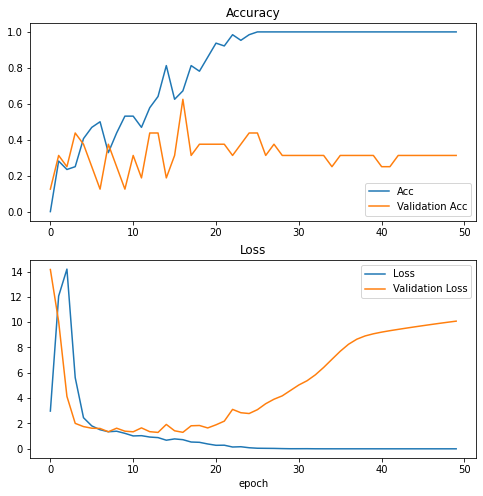

In [63]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2)
plot_history(his)

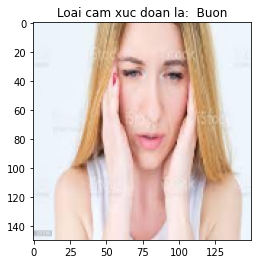

In [64]:
label = ['Buon', 'Gian Du', 'Hanh Phuc', 'So Hai']
plt.title("Loai cam xuc doan la:  " + label[np.argmax(model.predict(x_pre_0.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_0, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

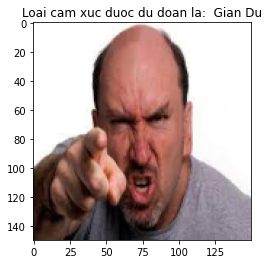

In [65]:
plt.title("Loai cam xuc duoc du doan la:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

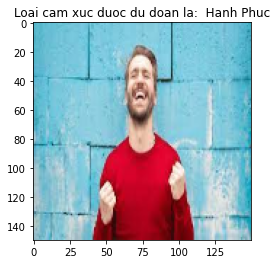

In [66]:
plt.title("Loai cam xuc duoc du doan la:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

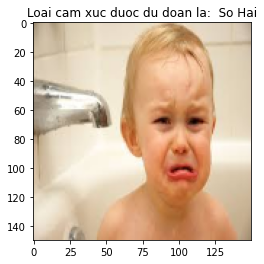

In [67]:
plt.title("Loai cam xuc duoc du doan la:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

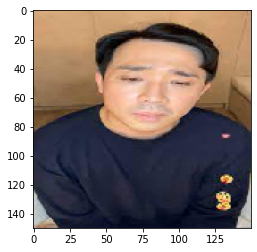

Hanh Phuc


In [71]:
img = tf.keras.utils.load_img("testbuon.jpg", target_size = (150,150))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /=255
print(label[np.argmax(model.predict(img))])

In [ ]:
# https://drive.google.com/drive/folders/1MlGUpDvmjcXIV5lr8P68YCCMsjWR78VX?usp=sharing